<a href="https://colab.research.google.com/github/caxaxa/Brazilian_elections/blob/main/teste_urna_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testando Diferença Entre Urnas de 2020 e demais

In [1]:
#importando as Packages
import pandas as pd



In [2]:
# #Carregando dado
df = pd.read_excel('https://brazilwasstolen.com/wp-content/uploads/2022/11/VOTOS_T1E2.xlsx', header = 1 )

# Baixa a planilha contendo as localizacoes
#Disponível no repositório

df_loc = pd.read_csv('/content/chacha.csv', sep = ';', encoding = 'Latin-1')

In [3]:
# !mkdir CSVs

In [4]:
# # Baixar os csv da base de dados do TSE

# import os
# import requests, zipfile, io

# UFs = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'ZZ']
# # Para cada mês há dois *.zip. Os urls usam a mesma base:
# url_base =['https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/buweb/bweb_1t_{}_051020221321.zip', 'https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/buweb/bweb_2t_{}_311020221535.zip' ]

# def csv_downloader():
#   for i in UFs:
#     for j in url_base:
#       r = requests.get(j.format(i))
#       z = zipfile.ZipFile(io.BytesIO(r.content))
#       z.extractall("/content/CSVs")
#       print('O Estado {} deu certo'.format(i))



In [5]:
# #Baixa e extrai os CSVs
# csv_downloader()

In [31]:
#cria o campo chave para criar as localizacoes

df_loc['LOC_KEY'] = df_loc['CD_MUNICIPIO'].astype('str') + '_' + df_loc['NR_ZONA'].astype('str') + '_' + df_loc['NR_SECAO'].astype('str')

In [23]:
#Criando uma variável para cada zona eleitoral (mudar para cada local de voto)
# Cria o campo chave para colocar a localizacao
df[['ESTADO','ID_1','ZONA','SECAO']] = df['ID_SECAO'].str.split('_', expand = True, n=0)
df['ID_ZONA'] = df['ID_1'] + '_' +  df['ZONA']
df['LOC_KEY'] = df['ID_ZONA'] + '_' +  df['SECAO']

In [36]:
# Cria o campo com as localizacoes usando pandas.merge() para fazer o mapping

df['LOC'] = pd.merge(df_loc, df, how ='inner', on ='LOC_KEY')['NM_LOCAL_VOTACAO']




In [37]:
df['LOC']

0         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
1         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
2         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
3         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
4         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
                             ...                     
472022                                            NaN
472023                                            NaN
472024                                            NaN
472025                                            NaN
472026                                            NaN
Name: LOC, Length: 472027, dtype: object

In [43]:
df[['ID_SECAO', 'NR_ZONA', 'SECAO','LOC']] # Novos dados, fazer um MAP de CD_MUN, NR_ZONA_SECAO

,ID_SECAO,NR_ZONA,SECAO,LOC
472022,ZZ_99180_1_1228,1,1228,NaN
472023,ZZ_99287_1_1259,1,1259,NaN
472024,ZZ_99317_1_1282,1,1282,NaN
472025,ZZ_99430_1_145,1,145,NaN
472026,ZZ_99473_1_1327,1,1327,NaN


In [45]:
n_zonas = len(df['ID_ZONA'].unique())
print('Há {} zonas diferentes no Brasil'.format(str(n_zonas)))

Há 6241 zonas diferentes no Brasil


In [46]:
n_loc = len(df['LOC'].unique())
print('Há {} localidades diferentes no Brasil'.format(str(n_loc)))

Há 85085 localidades diferentes no Brasil


In [47]:
#tirando as colunas sem informacao do modelo de urna ()
df = df[df['LOG_MODELO']!= '-']


In [48]:
#Estudando um exemplo
df[(df['NM_MUNICIPIO']== 'CAMPO GRANDE') & (df['UF']== 'MS') & (df['ZONA']== '8')]

,ID_SECAO,ID_MUNICIPIO,REGIAO,UF,CD_MUNICIPIO,NM_MUNICIPIO,MUNICIPIO_GEO,FX_APTOS_MUNICIPIO,CODMUN_IBGE,FG_CAPITAL,...,T2QTVAL,T2QT13,T2QT22,ESTADO,ID_1,ZONA,SECAO,ID_ZONA,LOC_KEY,LOC
173088,MS_90514_8_10,MS_90514,C,MS,90514,CAMPO GRANDE,CAMPO GRANDE,2 500K-1M,500270,1,...,234,70,164,MS,90514,8,10,90514_8,90514_8_10,ESCOLA ESTADUAL CORONEL JUCA PINTO
173089,MS_90514_8_11,MS_90514,C,MS,90514,CAMPO GRANDE,CAMPO GRANDE,2 500K-1M,500270,1,...,157,30,127,MS,90514,8,11,90514_8,90514_8_11,ESCOLA ESTADUAL CORONEL JUCA PINTO
173090,MS_90514_8_12,MS_90514,C,MS,90514,CAMPO GRANDE,CAMPO GRANDE,2 500K-1M,500270,1,...,262,66,196,MS,90514,8,12,90514_8,90514_8_12,ESCOLA ESTADUAL CORONEL JUCA PINTO
173091,MS_90514_8_60,MS_90514,C,MS,90514,CAMPO GRANDE,CAMPO GRANDE,2 500K-1M,500270,1,...,220,44,176,MS,90514,8,60,90514_8,90514_8_60,ESCOLA ESTADUAL CORONEL JUCA PINTO
173092,MS_90514_8_61,MS_90514,C,MS,90514,CAMPO GRANDE,CAMPO GRANDE,2 500K-1M,500270,1,...,219,55,164,MS,90514,8,61,90514_8,90514_8_61,ESCOLA ESTADUAL CORONEL JUCA PINTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173491,MS_90514_8_647,MS_90514,C,MS,90514,CAMPO GRANDE,CAMPO GRANDE,2 500K-1M,500270,1,...,247,111,136,MS,90514,8,647,90514_8,90514_8_647,ESCOLA ESTADUAL MINISTRO ALFREDO DE VILHENA VA...
173492,MS_90514_8_648,MS_90514,C,MS,90514,CAMPO GRANDE,CAMPO GRANDE,2 500K-1M,500270,1,...,255,100,155,MS,90514,8,648,90514_8,90514_8_648,ESCOLA ESTADUAL MINISTRO ALFREDO DE VILHENA VA...
173493,MS_90514_8_649,MS_90514,C,MS,90514,CAMPO GRANDE,CAMPO GRANDE,2 500K-1M,500270,1,...,108,51,57,MS,90514,8,649,90514_8,90514_8_649,ESCOLA ESTADUAL MINISTRO ALFREDO DE VILHENA VA...
173494,MS_90514_8_651,MS_90514,C,MS,90514,CAMPO GRANDE,CAMPO GRANDE,2 500K-1M,500270,1,...,51,18,33,MS,90514,8,651,90514_8,90514_8_651,ESCOLA MUNICIPAL PROF. MILTON LAGE


In [49]:
#Criando a variável diferenca percentual
df['diff_media'] = (df['T2QT22'] -	df['T2QT13'])/df['T2QTVAL']	

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
# Agrupa Zonas e modelos de urna, e conta quantas observacoes únicas existem
# A terceira coluna mostra o número de zonas e modelos de urna únicos
df_zona_modelo = df.groupby(['ID_ZONA', 'LOG_MODELO','LOG_FG2020']).size()

,ID_ZONA,LOG_MODELO,LOG_FG2020,0
0,10006_11,UE2020,1,26
1,10014_30,UE2020,1,17
2,10022_40,UE2010,0,16
3,10030_52,UE2020,1,53
4,10049_44,UE2015,0,33
...,...,...,...,...
10464,99031_41,UE2010,0,8
10465,99058_44,UE2015,0,66
10466,99074_41,UE2010,0,9
10467,99317_1,UE2009,0,1


In [58]:
# Agora com Localidades
df_loc_modelo = df.groupby(['LOC', 'LOG_MODELO','LOG_FG2020']).size()
df_loc_modelo = pd.DataFrame(df_loc_modelo).reset_index()
df_loc_modelo

,LOC,LOG_MODELO,LOG_FG2020,0
0,(ANTIGA) ESCOLA MUNICIPAL FLORENCIO DE ABREU,UE2020,1,1
1,(APAE) CRAEE,UE2010,0,1
2,(APAE) CRAEE,UE2013,0,1
3,(APAE) CRAEE,UE2020,1,1
4,(BRIZOLINHA) ESCOLA ESTADUAL GILBERTO FREIRE,UE2015,0,2
...,...,...,...,...
115598,ÍNDIO MARAJÓ E.E. INDÍGENA,UE2015,0,2
115599,ÍNDIO MAURO E.E INDÍGENA,UE2015,0,1
115600,ÓRBIS CLUBE,UE2013,0,1
115601,ÓZIMO LOPES DOS SANTOS (EMEF -D-19 (SANTA CRUZ),UE2011,0,1


In [59]:
# Aqui eu conto quantas zonas possuem mais de um tipo de urna
df_zonas_audit = df_zona_modelo.groupby(['ID_ZONA']).size()

df_zonas_audit = pd.DataFrame(df_zonas_audit.sort_values(ascending = False))

df_zonas_audit = df_zonas_audit.reset_index()

#double checking
#df_zona_modelo.pivot_table(columns=['ID_ZONA'], aggfunc='size').sort_values(ascending = False)

In [60]:
# Agora com Localidades
df_loc_audit = df_loc_modelo.groupby(['LOC']).size()

df_loc_audit = pd.DataFrame(df_loc_audit.sort_values(ascending = False))

df_loc_audit = df_loc_audit.reset_index()

#double checking
#df_loc_modelo.pivot_table(columns=['ID_ZONA'], aggfunc='size').sort_values(ascending = False)

In [61]:
#cria a lista de zonas para serem estudadas (Aquelas que tiverem ao menos mais de dois tipos de urna)
lista_de_zonas_1 = df_zonas_audit[df_zonas_audit[0] > 1]['ID_ZONA']

In [62]:
#retira as zonas que tem mais de um tipo de urna, porém nao tem nenhuma modelo 2020
lista_de_zonas_2 = df[(df['ID_ZONA'].isin(lista_de_zonas_1))][['ID_ZONA','LOG_FG2020']]
lista_de_zonas_2 = lista_de_zonas_2.groupby('ID_ZONA').sum().reset_index()

lista_de_zonas_2 = lista_de_zonas_2[lista_de_zonas_2['LOG_FG2020']!= 0]['ID_ZONA']
lista_de_zonas_2

45       1392_1
46       1392_9
61       1538_8
94       2550_1
95       2550_2
         ...   
1739    93858_2
1749    95192_7
1755    95591_3
1757    9571_57
1765    9652_80
Name: ID_ZONA, Length: 459, dtype: object

In [66]:
#Agora com localidades
#cria a lista de loc para serem estudadas (Aquelas que tiverem ao menos mais de dois tipos de urna)
lista_de_loc_1 = df_loc_audit[df_loc_audit[0] > 1]['LOC']
lista_de_loc_2 = df[(df['LOC'].isin(lista_de_loc_1))][['LOC','LOG_FG2020']]
lista_de_loc_2 = lista_de_loc_2.groupby('LOC').sum().reset_index()

lista_de_loc_2 = lista_de_loc_2[lista_de_loc_2['LOG_FG2020']!= 0]['LOC']
lista_de_loc_2

0                                             (APAE) CRAEE
1                    (CAIC)ESCOLA MUNICIPAL CAPITÃO WAGNER
3        (GINÁSIO) ESCOLA ESTADUAL DOUTOR JOÃO DA ROCHA...
4               (GRUPO) ESCOLA MUNICIPAL CORREIA DEFREITAS
8        (VERCINDES) ESCOLA MUNICIPAL PROFESSORA LUCILI...
                               ...                        
17849                                    VITORIA MOTA CRUZ
17851         WALTER PERACCHI DE BARCELOS - E. M.E.F. GOV.
17854                ZAIRA - (E. E. E. F. ZAIRA HAUSCHILD)
17855            ZONA RURAL - E. E. HENRIQUE JOSÉ TRINDADE
17856                         ÉRICO VERÍSSIMO-E.E.ENS.MED.
Name: LOC, Length: 10192, dtype: object

In [67]:

df_calculo = df[(df['ID_ZONA'].isin(lista_de_zonas_2)) ][['ID_ZONA','LOG_MODELO','LOG_FG2020','diff_media','SECAO']]


In [69]:
df_final = df_calculo.groupby(['ID_ZONA', 'LOG_FG2020']).mean().reset_index()

In [70]:
df_final.groupby('LOG_FG2020').mean()

,diff_media
LOG_FG2020,
0,0.140039
1,0.176183


In [71]:
df_final.groupby('LOG_FG2020').count()

,ID_ZONA,diff_media
LOG_FG2020,,
0,459,459
1,459,459


In [75]:
# com loc
df_calculo_loc = df[(df['LOC'].isin(lista_de_loc_2)) ][['LOC','LOG_MODELO','LOG_FG2020','diff_media','SECAO']]
df_final_loc = df_calculo_loc.groupby(['LOC', 'LOG_FG2020']).mean().reset_index()

In [76]:
df_final_loc.groupby('LOG_FG2020').mean()

,diff_media
LOG_FG2020,
0,0.025268
1,0.065673


In [78]:
df_final_loc.groupby('LOG_FG2020').count()

,LOC,diff_media
LOG_FG2020,,
0,10192,10192
1,10192,10192


In [79]:
dist = []
dist = pd.DataFrame(dist)

dist['U2020'] = df_final[df_final['LOG_FG2020'] == 1]['diff_media'].values
dist['U2XXX'] = df_final[df_final['LOG_FG2020'] == 0]['diff_media'].values




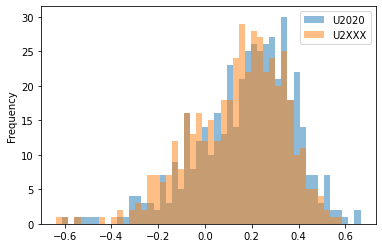

In [80]:
dist.plot.hist(alpha = 0.5, bins = 50 )

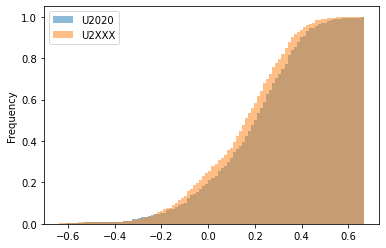

In [81]:
dist.plot.hist(cumulative=True, density=1, bins=100, alpha=0.5)

In [84]:
dist_loc = []
dist_loc = pd.DataFrame(dist_loc)

dist_loc['U2020'] = df_final_loc[df_final_loc['LOG_FG2020'] == 1]['diff_media'].values
dist_loc['U2XXX'] = df_final_loc[df_final_loc['LOG_FG2020'] == 0]['diff_media'].values


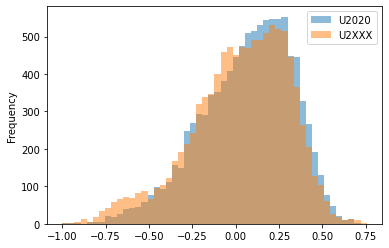

In [85]:
dist_loc.plot.hist(alpha = 0.5, bins = 50 )

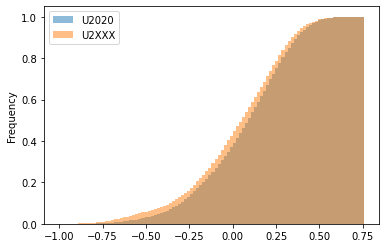

In [86]:
dist_loc.plot.hist(cumulative=True, density=1, bins=100, alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1433049c50>]],
      dtype=object)

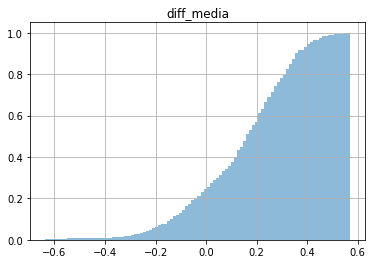

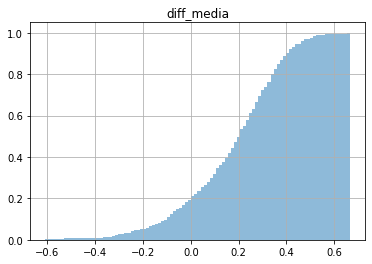

In [82]:
df_final[df_final['LOG_FG2020'] == 0][['diff_media']].hist(cumulative=True, density=1, bins=100, alpha=0.5)
df_final[df_final['LOG_FG2020'] == 1][['diff_media']].hist(cumulative=True, density=1, bins=100, alpha=0.5)

In [83]:
#Rodar o teste Kolmogorov-Simirnov pra testar se as distrinuições são diferentes
from scipy import stats
import matplotlib.pyplot as plt 
import numpy as np

U2020 = np.array(df_final[df_final['LOG_FG2020'] == 1]['diff_media']).cumprod()
U2XXX = np.array(df_final[df_final['LOG_FG2020'] == 0]['diff_media']).cumprod()

stats.kstest(U2020, U2XXX, alternative = 'less')

KstestResult(statistic=0.10675381263616558, pvalue=0.005325805612974558)

In [87]:
#agora com localidadesD
U2020 = np.array(df_final_loc[df_final_loc['LOG_FG2020'] == 1]['diff_media']).cumprod()
U2XXX = np.array(df_final_loc[df_final_loc['LOG_FG2020'] == 0]['diff_media']).cumprod()

stats.kstest(U2020, U2XXX, alternative = 'less')

KstestResult(statistic=0.0042189952904238635, pvalue=0.8305760416942164)

## Teste de robustez

Rodar o Kolmogorv-Smirnov em amostras aleatórias das mesmas zonas.



In [ ]:
# Calcula numero de secao em cada ID_zona da lista

df_to_dict = df_calculo[['ID_ZONA', 'SECAO']].groupby(['ID_ZONA']).count().reset_index()

dict_1 = pd.Series(df_to_dict['SECAO'].values,index=df_to_dict['ID_ZONA']).to_dict()


In [ ]:
from random import randint, seed

In [ ]:
# Monta a funcao que gera as amostras
def sampler(): #fixar uma seed para publicar depois
  sample = np.zeros(len(lista_de_zonas_2))
  for i,j,k in zip(dict_1.keys(),range(len(dict_1.keys())), dict_1.values()):
    sample[j] = df_calculo[df_calculo['ID_ZONA']==i]['diff_media'].values[randint(1,k-1)]
  return sample



In [ ]:
#Criando as amostras aleatórias de cada zona eleitoral escolhida

sample_1 = sampler()
sample_2 = sampler()
sample_3 = sampler()
sample_4 = sampler()

### Testando KS test


In [ ]:
stats.kstest(sample_1, sample_2, alternative = 'less')

KstestResult(statistic=0.037037037037037035, pvalue=0.5330778455530156)

In [ ]:
stats.kstest(sample_1, sample_3, alternative = 'less')

KstestResult(statistic=0.054466230936819175, pvalue=0.256443886193023)

In [ ]:
stats.kstest(sample_1, sample_4, alternative = 'less')

KstestResult(statistic=0.0457516339869281, pvalue=0.3828649967027105)

In [ ]:
stats.kstest(sample_2, sample_4, alternative = 'less')

KstestResult(statistic=0.0392156862745098, pvalue=0.49396311894011097)

In [ ]:
stats.kstest(sample_3, sample_4, alternative = 'less')

KstestResult(statistic=0.0457516339869281, pvalue=0.3828649967027105)

In [ ]:
stats.kstest(sample_2, sample_3, alternative = 'less')

KstestResult(statistic=0.030501089324618737, pvalue=0.6527138536209176)